# Text Classification-part2 
Nabiha Tariq, Naima Khan, Javeria Ishaque, Sameen Amna, Suha Ahmed

In [1]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [2]:
#SVM

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [4]:
file_path = "/Users/nabihatariq/Downloads/Tweets.csv"
df = pd.read_csv(file_path)

In [5]:
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [6]:
df['tweet_created'] = pd.to_datetime(df['tweet_created']).dt.date

In [7]:
df['tweet_created'] = pd.to_datetime(df['tweet_created'])

In [8]:
df['tweet_created'].min()

Timestamp('2015-02-16 00:00:00')

In [9]:
df['tweet_created'].max()

Timestamp('2015-02-24 00:00:00')

In [10]:
#checking uniques values in tweet_created columns
df['tweet_created'].nunique()

9

In [11]:
numberoftweets = df.groupby('tweet_created').size()

In [12]:
print("Percentage null or na values in df")
((df.isnull() | df.isna()).sum() * 100 / df.index.size).round(2)

Percentage null or na values in df


tweet_id                         0.00
airline_sentiment                0.00
airline_sentiment_confidence     0.00
negativereason                  37.31
negativereason_confidence       28.13
airline                          0.00
airline_sentiment_gold          99.73
name                             0.00
negativereason_gold             99.78
retweet_count                    0.00
text                             0.00
tweet_coord                     93.04
tweet_created                    0.00
tweet_location                  32.33
user_timezone                   32.92
dtype: float64

In [13]:
#Removing columns with majority missing values
del df['tweet_coord']
del df['airline_sentiment_gold']
del df['negativereason_gold']
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24,NaN,Pacific Time (US & Canada)


In [14]:
freq = df.groupby('negativereason').size()

In [15]:
freq

negativereason
Bad Flight                      580
Can't Tell                     1190
Cancelled Flight                847
Customer Service Issue         2910
Damaged Luggage                  74
Flight Attendant Complaints     481
Flight Booking Problems         529
Late Flight                    1665
Lost Luggage                    724
longlines                       178
dtype: int64

In [16]:
df['airline'].unique()

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

In [17]:
df.drop(df.loc[df['airline_sentiment']=='neutral'].index, inplace=True)

In [18]:
date = df.reset_index()
#convert the Date column to pandas datetime
date.tweet_created = pd.to_datetime(date.tweet_created)
#Reduce the dates in the date column to only the date and no time stamp using the 'dt.date' method
date.tweet_created = date.tweet_created.dt.date
date.tweet_created.head()
df = date
day_df = df.groupby(['tweet_created','airline','airline_sentiment']).size()
# day_df = day_df.reset_index()
day_df

tweet_created  airline         airline_sentiment
2015-02-16     Delta           negative               1
               United          negative               2
2015-02-17     Delta           negative             108
                               positive              69
               Southwest       negative             213
                                                   ... 
2015-02-24     US Airways      positive              16
               United          negative             142
                               positive              25
               Virgin America  negative              10
                               positive              13
Length: 92, dtype: int64

In [19]:
def tweet_to_words(tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words ))

In [20]:
nltk.download('stopwords')
df['clean_tweet']=df['text'].apply(lambda x: tweet_to_words(x))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nabihatariq/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
x = df.clean_tweet
y = df.airline_sentiment

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

8655 8655
2886 2886


In [23]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(x_train)

CountVectorizer()

In [24]:
x_train_dtm = vect.transform(x_train)
x_test_dtm = vect.transform(x_test)

In [25]:
vect_tunned = CountVectorizer(stop_words='english', ngram_range=(1,2), min_df=0.1, max_df=0.7, max_features=100)
vect_tunned

CountVectorizer(max_df=0.7, max_features=100, min_df=0.1, ngram_range=(1, 2),
                stop_words='english')

In [26]:
#training SVM model with linear kernel
#Support Vector Classification-wrapper around SVM
from sklearn.svm import SVC
model = SVC(kernel='linear', random_state = 10)
model.fit(x_train_dtm, y_train)
#predicting output for test data
pred = model.predict(x_test_dtm)

In [27]:
accuracy_score(y_test,pred)

0.9081774081774082

In [28]:
confusion = confusion_matrix(y_test, pred)
confusion

array([[2194,  129],
       [ 136,  427]])

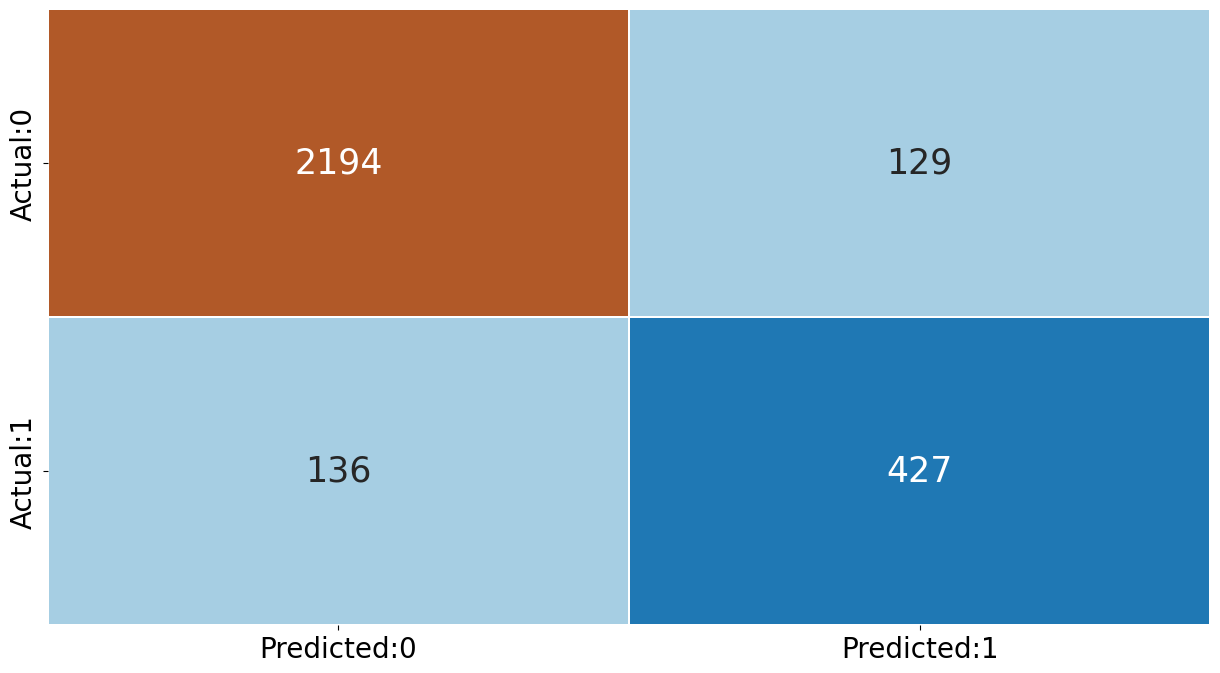

In [29]:
plt.rcParams['figure.figsize'] = [15,8]
conf_matrix = pd.DataFrame(data = confusion,columns = ['Predicted:0','Predicted:1',], index = ['Actual:0','Actual:1',])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Paired', cbar = False,linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [30]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

    negative       0.94      0.94      0.94      2323
    positive       0.77      0.76      0.76       563

    accuracy                           0.91      2886
   macro avg       0.85      0.85      0.85      2886
weighted avg       0.91      0.91      0.91      2886



In [31]:
#Decision Trees

In [40]:
import pandas as pd
import numpy as np
import seaborn as sb
import plotly.express as px
import matplotlib.pyplot as plt
import re
import os
import nltk
from sklearn.svm import SVC
from nltk.corpus import stopwords  
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [50]:
A = df.clean_tweet
y = df.airline_sentiment

In [51]:
tf = TfidfVectorizer()
Clean_A =  tf.fit_transform(A)

In [53]:
A_train , A_test , y_train , y_test = train_test_split(Clean_A , y , test_size=0.25,random_state=3)

In [54]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(A_train,y_train)
decision_tree_pred=decision_tree.predict(A_test)
accuracy_score(decision_tree_pred,y_test)

0.8544698544698545

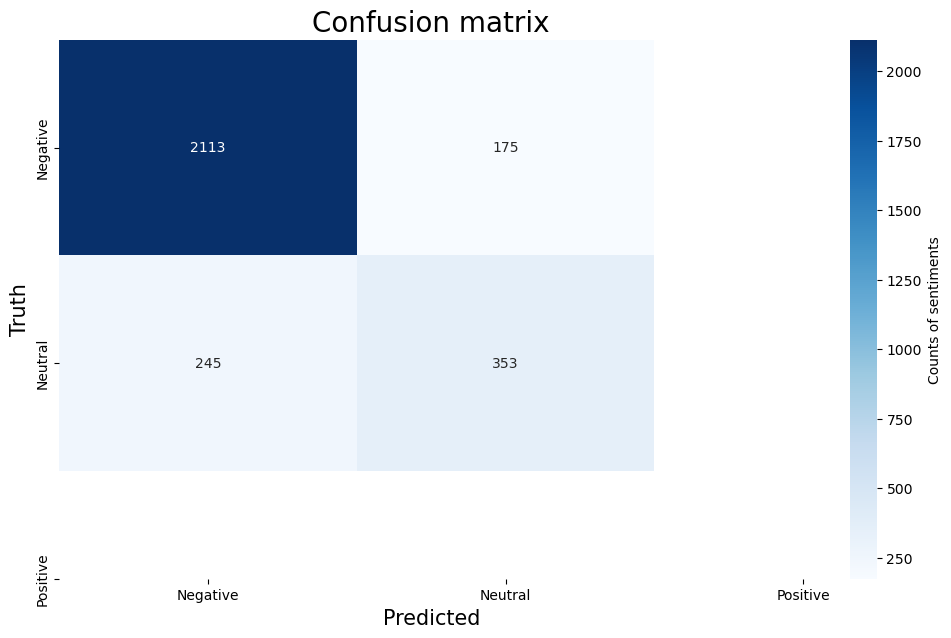

In [56]:
cm_dsn = confusion_matrix(y_test,decision_tree_pred)

# plot confusion matrix 
plt.figure(figsize=(12,7))
sentiment_classes = ['Negative', 'Neutral', 'Positive']
sb.heatmap(cm_dsn, cmap=plt.cm.Blues, annot=True,cbar_kws={'label': 'Counts of sentiments'},  fmt='d',  
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Truth', fontsize=15)
plt.title('Confusion matrix', fontsize=20)
plt.show()

In [57]:
print(classification_report(y_test,decision_tree_pred))

              precision    recall  f1-score   support

    negative       0.90      0.92      0.91      2288
    positive       0.67      0.59      0.63       598

    accuracy                           0.85      2886
   macro avg       0.78      0.76      0.77      2886
weighted avg       0.85      0.85      0.85      2886



In [58]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
#Random Forest


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, accuracy_score

In [60]:
B = df.clean_tweet
C = df.airline_sentiment

In [61]:
X_train, X_test, y_train, y_test = train_test_split(B, C, test_size=0.2, random_state=42)

In [62]:
vectorizer = CountVectorizer(max_features=5000)

In [63]:
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [79]:
random_classifier = RandomForestClassifier(n_estimators=100, random_state=40)
random_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=40)

In [80]:
y_pred = random_classifier.predict(X_test)

In [81]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.8930272845387613
Classification Report:
               precision    recall  f1-score   support

    negative       0.93      0.94      0.93      1862
    positive       0.74      0.69      0.71       447

    accuracy                           0.89      2309
   macro avg       0.83      0.82      0.82      2309
weighted avg       0.89      0.89      0.89      2309



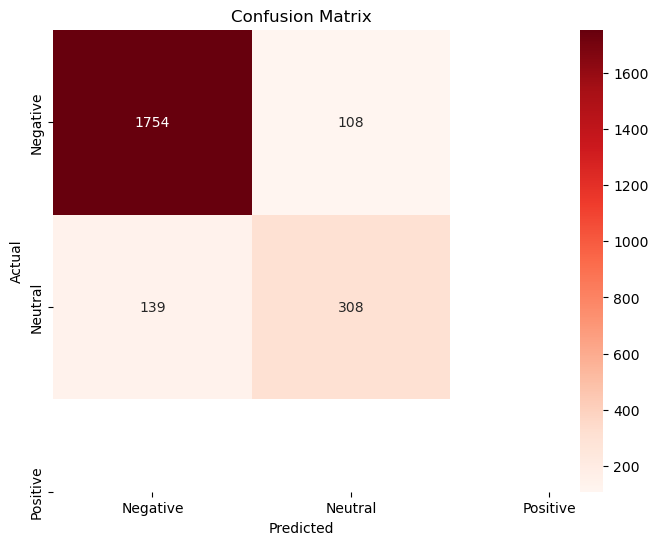

In [82]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', 
            xticklabels=['Negative', 'Neutral', 'Positive'], 
            yticklabels=['Negative', 'Neutral', 'Positive'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



In [ ]:
#Stochastic Gradient


In [83]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [84]:
X_train, X_test, y_train, y_test = train_test_split(B, C, test_size=0.2, random_state=42)

In [85]:
vectorizer = CountVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [94]:
from sklearn.linear_model import SGDClassifier

# SGDClassifier with 'hinge' loss function
sgd_classifier = SGDClassifier(loss='hinge')

# Fit classifier to training data
sgd_classifier.fit(X_train, y_train)


SGDClassifier()

In [91]:
y_pred = sgd_classifier.predict(X_test)

In [92]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9094846253789519
Classification Report:
               precision    recall  f1-score   support

    negative       0.94      0.95      0.94      1862
    positive       0.79      0.73      0.76       447

    accuracy                           0.91      2309
   macro avg       0.86      0.84      0.85      2309
weighted avg       0.91      0.91      0.91      2309



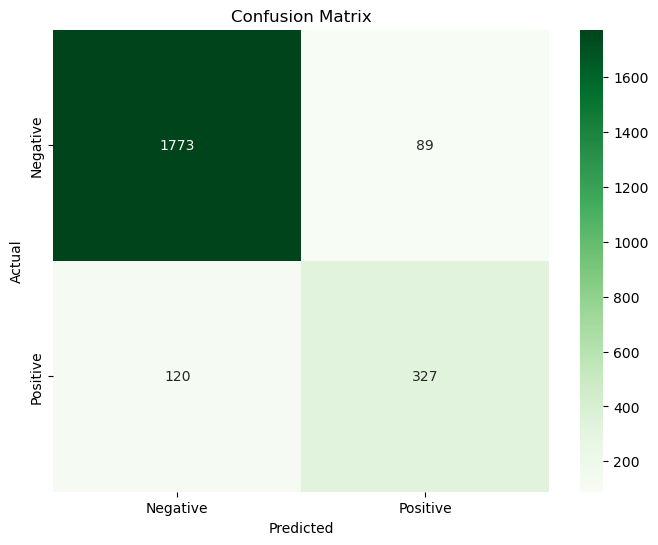

In [96]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



In [97]:
#Ensemble
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report

In [98]:

X_train, X_test, y_train, y_test = train_test_split(B, C, test_size=0.2, random_state=42)

In [99]:
vectorizer = CountVectorizer(max_features=5000)

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [100]:
#Random Forest and SGD

random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
sgd_classifier = SGDClassifier(loss='hinge', random_state=42)

In [101]:
#VotingClassifier is an ensemble learning method that combines the predictions of multiple base classifiers to make a final decision.
voting_classifier = VotingClassifier(estimators=[
    ('RandomForest', random_forest_classifier),
    ('SGD', sgd_classifier)
], voting='hard')

In [102]:
voting_classifier.fit(X_train, y_train)

y_pred = voting_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9064530099610221
Classification Report:
               precision    recall  f1-score   support

    negative       0.91      0.98      0.94      1862
    positive       0.86      0.62      0.72       447

    accuracy                           0.91      2309
   macro avg       0.89      0.80      0.83      2309
weighted avg       0.90      0.91      0.90      2309



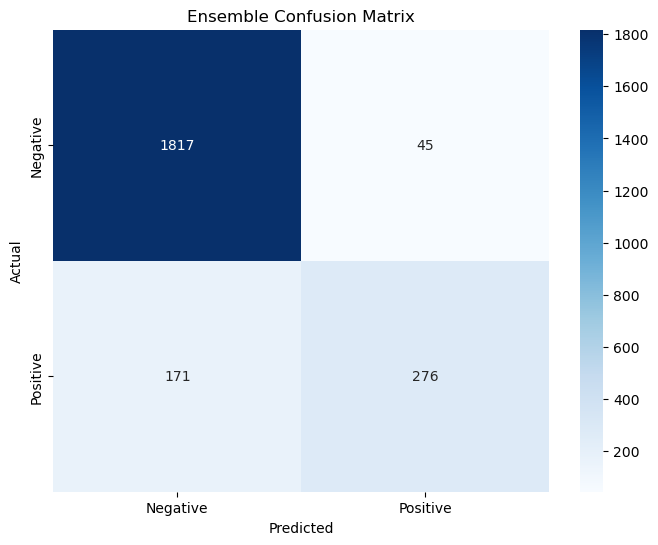

In [103]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Ensemble Confusion Matrix')
plt.show()